In [1]:
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from Image_Functions import slicing,  crop_to_size
from datasetModule import Set
from torch import nn
from Dice_Loss import DiceLoss
import Model_Aske
from Model import CNN
from ExtraCrossEntropy import ExtraCrossEntropy
from matplotlib import pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


Most of the functionallity is stored in module files. 
The data consist of Images with 3 channels and segmentation images with 2 channels.


In [2]:
#hyper parameters
batch_size = 2
learning_rate = 0.01
num_epochs = 4

In [3]:
"Need to specify the local path on computer"
dir_path = "../Cropped_Task3/"

'Splitting the data into 30% test and 70% training.'
train_set, test_set = train_test_split(Set(dir_path, sub_dir = 'crop_sub-23'), test_size=0.3, random_state=25)

#X_train, X_test = crop_images_to_brain(X_train), crop_images_to_brain(X_test)
size = (256,288,176)
train_set = crop_to_size(train_set, size)
test_set = crop_to_size(test_set, size)

'Load training and test set, batch size my vary'
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)
test_set = None
train_set = None

../Cropped_Task3/crop_sub-233


In [7]:
'Run the CNN'
model = CNN(3,base_features=16).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
n_total_steps = len(train_loader)




In [ ]:
""" examples = iter(train_loader)
samples = examples.next()

try:
    while (samples['seg'][0][0].max() == 0) or (samples['seg'][0][0].max() == 0):
        samples = examples.next()
except StopIteration:
    print('Iteration is shit')
data = samples['data']
seg = samples['seg']

print(seg.max())
print(seg.shape)
print(data.shape)
out = model(data) """



In [ ]:
""" img_1 = out[0][0]
img_2 = data[0][0]
print(img_1.shape)
print(img_2.shape)
img_1 = img_1.detach().numpy()
img_2 = img_2.detach().numpy()
slicing(img_1)
slicing(img_2) """

In [ ]:

""" loss_func_1 = nn.BCELoss()
loss_func_2 = DiceLoss()
loss_func_3 = ExtraCrossEntropy()
#target = torch.squeeze(seg, 0).type(torch.LongTensor)
#target = seg.resize_(1,256,288,176).type(torch.LongTensor)
seg = seg.float()
sigmoid = nn.Sigmoid()
out_sig = sigmoid(out)
out_sig_2 = out_sig.detach()
loss_1 = loss_func_1(out_sig, out_sig_2)
print(loss_1)
loss_2 = loss_func_2(out, out)
print(loss_2)
loss_3 = loss_func_3(out, seg)
print(loss_3) """

Notes on how things are going: 


BCELoss requires no squeezing, where as Cross Entropy requires the feature dimension to be squeezed

In [10]:
loss_func_2 = DiceLoss()


In [11]:
losses = []
for epoch in range(2):
    for i, image_set in enumerate(train_loader):
        image = image_set['data'].to(device)
        labels = image_set['seg'].to(device)
        optimizer.zero_grad()
        outputs = model(image)

        print("outputs shape = ", outputs.shape)
        print("labels shape = ", labels.shape)
        loss = loss_func_2(outputs, labels)
        print(loss.item())
        losses.append(loss.item())
        print(2)
        loss.backward()
        print(3)
        optimizer.step()
        print(4)
        if (i+1) % 1 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

Layer 1:  torch.Size([2, 32, 256, 288, 176])
Layer 2:  torch.Size([2, 32, 128, 144, 88])
Final =  torch.Size([2, 1, 256, 288, 176])
outputs shape =  torch.Size([2, 1, 256, 288, 176])
labels shape =  torch.Size([2, 1, 256, 288, 176])
0.9997078047218897
2
3
4
epoch 1 / 4, step 1/2, loss = 0.9997
Layer 1:  torch.Size([1, 32, 256, 288, 176])
Layer 2:  torch.Size([1, 32, 128, 144, 88])
Final =  torch.Size([1, 1, 256, 288, 176])
outputs shape =  torch.Size([1, 1, 256, 288, 176])
labels shape =  torch.Size([1, 1, 256, 288, 176])
0.9999994726012735
2
3
4
epoch 1 / 4, step 2/2, loss = 1.0000
Layer 1:  torch.Size([2, 32, 256, 288, 176])
Layer 2:  torch.Size([2, 32, 128, 144, 88])
Final =  torch.Size([2, 1, 256, 288, 176])
outputs shape =  torch.Size([2, 1, 256, 288, 176])
labels shape =  torch.Size([2, 1, 256, 288, 176])
0.9999997044283578
2
3
4
epoch 2 / 4, step 1/2, loss = 1.0000
Layer 1:  torch.Size([1, 32, 256, 288, 176])
Layer 2:  torch.Size([1, 32, 128, 144, 88])
Final =  torch.Size([1, 1,

[0.9997078047218897, 0.9999994726012735, 0.9999997044283578, 0.9999994219767614]


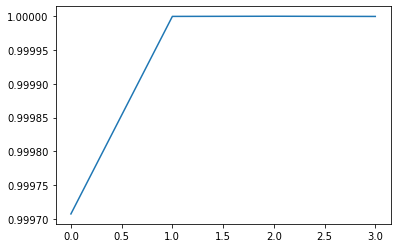

In [12]:
plt.plot(losses)
print(losses)

In [ ]:
print(out_img[0][0].shape)
img = out_img[0][0]
img = img.detach().numpy()
for imgur in image[0]:
    slicing(imgur)
#slicing(img)